Scraping Data from Source Site

In [0]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
req = Request('https://in.investing.com/commodities/brent-oil-historical-data?end_date=1587666600&interval_sec=monthly&st_date=347135400', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

In [0]:
soup =  BeautifulSoup(webpage,'lxml') #lxml is a Python library which allows for easy handling of XML and HTML files, and can also be used for web scraping.

In [0]:
#Now we should get the table of interest by class
table = soup.find('table',{'class':'common-table medium js-table'})

In [0]:
#get everyhing between tr(rows)
rows = table.findAll('tr')

In [0]:
#find everything within 'td'(columns) for every 'tr'(row)
all_rows = []
for row in rows:
  single_row = row.findAll('td')
  all_rows.append(single_row) # all_rows have elemnets which contain columns for every row


In [0]:
#getting text out of every column of a row
df = []
for row in all_rows:
  data = []
  for column in row:
    data.append(column.getText())
  df.append(data)

In [0]:
#Creating dataframe
import pandas as pd
oil_p = pd.DataFrame(df)

In [0]:
#Cleaning data
for i in range(7):
  oil_p[i] = oil_p[i].str.replace("\n","")
#Dropping 0th row
oil_p.drop(index = 0,inplace=True )

In [0]:
#setting column names
oil_p.columns = "Date Price Open High Low Volume Chg%".split()

In [23]:
oil_p.sort_index()

,Date,Price,Open,High,Low,Volume,Chg%
1,Apr 2020,19.33,26.00,36.40,15.98,637.21K,-15.00%
2,Mar 2020,22.74,48.95,53.90,21.65,7.36M,-54.99%
3,Feb 2020,50.52,56.16,60.00,50.05,5.27M,-13.14%
4,Jan 2020,58.16,66.41,71.75,57.71,5.80M,-11.88%
5,Dec 2019,66.00,60.73,68.99,60.30,4.45M,5.72%
...,...,...,...,...,...,...,...
378,Nov 1988,14.05,12.45,15.00,11.70,53.26K,10.28%
379,Oct 1988,12.74,11.83,13.95,11.30,31.33K,4.08%
380,Sep 1988,12.24,14.50,14.50,12.03,32.94K,-16.16%
381,Aug 1988,14.60,15.64,15.64,14.48,15.08K,-7.01%


For prediction purpose we will only be focusing on opening price

In [24]:
oil_op = oil_p[['Date','Open']]
oil_op.head()

,Date,Open
1,Apr 2020,26.00
2,Mar 2020,48.95
3,Feb 2020,56.16
4,Jan 2020,66.41
5,Dec 2019,60.73


In [25]:
oil_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 1 to 382
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    382 non-null    object
 1   Price   382 non-null    object
 2   Open    382 non-null    object
 3   High    382 non-null    object
 4   Low     382 non-null    object
 5   Volume  382 non-null    object
 6   Chg%    382 non-null    object
dtypes: object(7)
memory usage: 23.9+ KB


In [26]:
#Changing data type to Datetime and Float
oil_op['Date'] = oil_op['Date'].astype('datetime64[ns]')
oil_op['Open'] = oil_op['Open'].astype('float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
oil_op

,Date,Open
1,2020-04-01,26.00
2,2020-03-01,48.95
3,2020-02-01,56.16
4,2020-01-01,66.41
5,2019-12-01,60.73
...,...,...
378,1988-11-01,12.45
379,1988-10-01,11.83
380,1988-09-01,14.50
381,1988-08-01,15.64


In [28]:
oil_op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 1 to 382
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    382 non-null    datetime64[ns]
 1   Open    382 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


In [0]:
#Changing index to daterange
oil_op.set_index('Date',inplace = True)

In [30]:
oil_op.sort_index(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
oil_op.loc[:'2019']

,Open
Date,
1988-07-01,14.60
1988-08-01,15.64
1988-09-01,14.50
1988-10-01,11.83
1988-11-01,12.45
...,...
2019-08-01,64.09
2019-09-01,58.80
2019-10-01,59.38


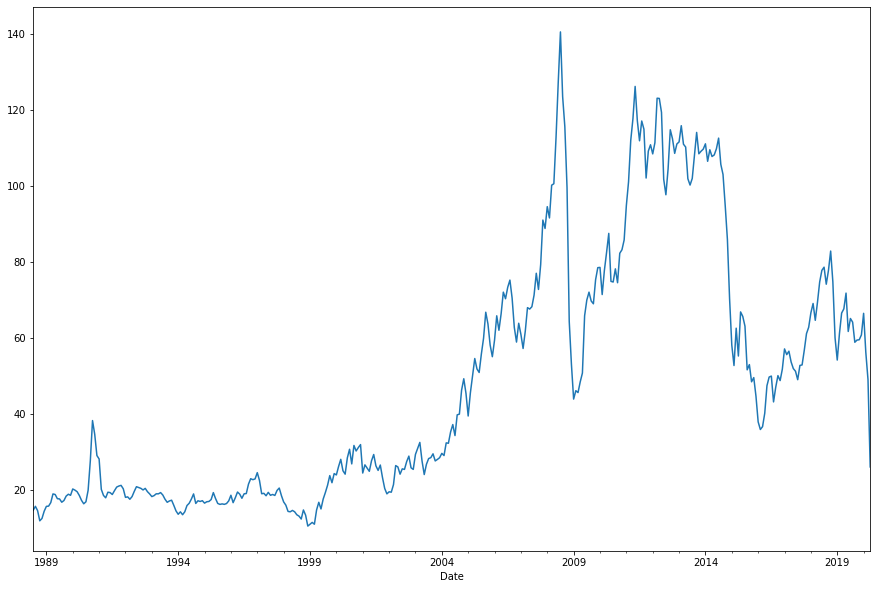

In [32]:
#Visualising price
oil_op.Open.plot(figsize = (15,10))

As it can be inferred from following diagram seasonality is constant while there is upward, stationary and downward trend respectively.


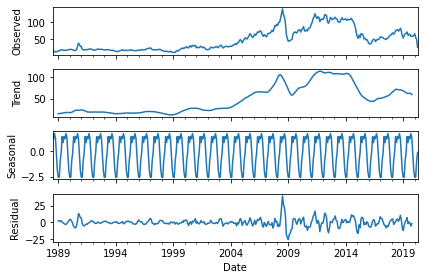

In [33]:
#Degrading into trend, seasonal and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_result = seasonal_decompose(oil_op.Open,model='add')
decomposed_result.plot();

In [34]:
#Here it can be inferred that seasonality has a period of 12 months
decomposed_result.seasonal.head(50)

Date
1988-07-01    1.498583
1988-08-01    1.270774
1988-09-01    1.783893
1988-10-01    1.337992
1988-11-01   -0.212968
1988-12-01   -1.897315
1989-01-01   -2.569441
1989-02-01   -2.562371
1989-03-01   -0.921228
1989-04-01   -0.098231
1989-05-01    1.482105
1989-06-01    0.888207
1989-07-01    1.498583
1989-08-01    1.270774
1989-09-01    1.783893
1989-10-01    1.337992
1989-11-01   -0.212968
1989-12-01   -1.897315
1990-01-01   -2.569441
1990-02-01   -2.562371
1990-03-01   -0.921228
1990-04-01   -0.098231
1990-05-01    1.482105
1990-06-01    0.888207
1990-07-01    1.498583
1990-08-01    1.270774
1990-09-01    1.783893
1990-10-01    1.337992
1990-11-01   -0.212968
1990-12-01   -1.897315
1991-01-01   -2.569441
1991-02-01   -2.562371
1991-03-01   -0.921228
1991-04-01   -0.098231
1991-05-01    1.482105
1991-06-01    0.888207
1991-07-01    1.498583
1991-08-01    1.270774
1991-09-01    1.783893
1991-10-01    1.337992
1991-11-01   -0.212968
1991-12-01   -1.897315
1992-01-01   -2.569441
1992-0

Now we wil smoothen curves using different tecniques and the one with best predictions on test data will be condisered as final

In [0]:
#splitting into test and train data
train = oil_op.loc[:"2018"]
test = oil_op.loc['2019']

In [0]:
#Accuracy will be judged by following constraints
import numpy as np
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual))* 100, 2 )

#Simple Moving average

In [37]:
#calculating simple moving average
train['sma'] = train.Open.rolling(window=2).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#Predicting from SMA
def SMA_prediction(periods):
  train1 = train.sma.values
  train2 = train1.tolist()
  pred = []
  for i in range(periods):
    c_batch = train2[-12:]
    next_pred = sum(c_batch) /12
    train2.append(next_pred)
    pred.append(next_pred)
  return pred
  


test['SMA_prediction'] = SMA_prediction(12)

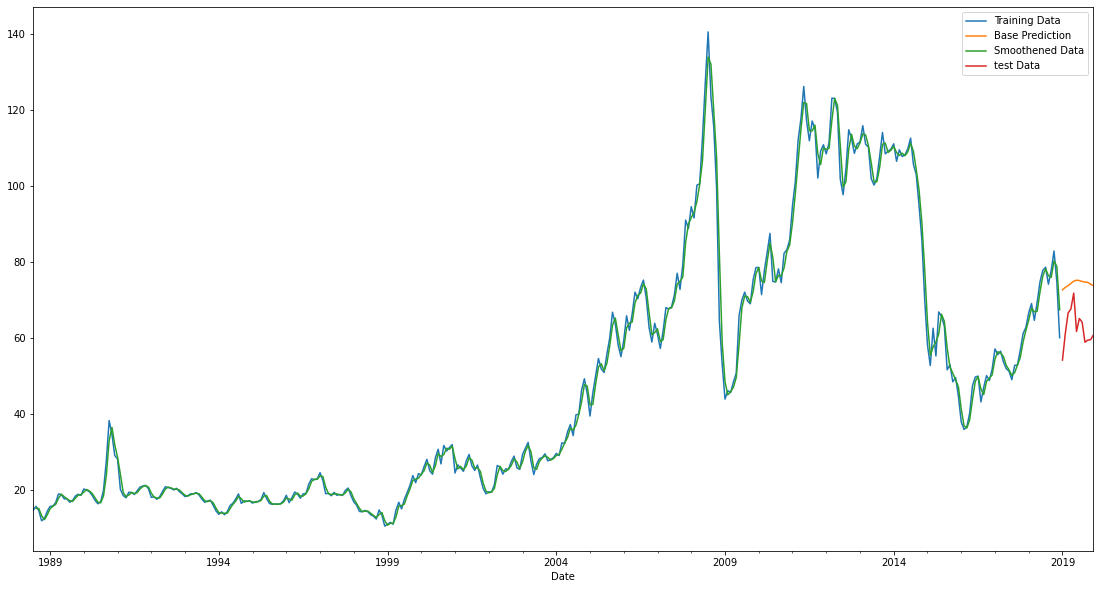

In [0]:
#Visualising price
train.Open.plot(figsize = (19,10),legend = True, label = 'Training Data')
test['SMA_prediction'].plot(figsize = (19,10),legend = True, label = 'Base Prediction')
train.sma.plot(figsize = (19,10),legend = True, label = 'Smoothened Data')
test['Open'].plot(figsize = (19,10),legend = True, label = 'test Data');

In [0]:
#Forecast Accuracy
get_mape(test.Open,test.SMA_prediction)

19.29

#Simple exponential smoothening
 This method is suitable for forecasting data with no clear trend or seasonal pattern.

In [0]:
#import simpleExpsmoothening from Holtswinter
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

Forecasts are calculated using weighted averages, where the weights decrease exponentially as observations come from further in the past — the smallest weights are associated with the oldest observations.

In [0]:
fitted_model = SimpleExpSmoothing(train.Open).fit()

train['SES'] = fitted_model.fittedvalues
train

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,sma,SES
Date,,,
1988-07-01,14.60,NaN,14.60
1988-08-01,15.64,15.120,14.60
1988-09-01,14.50,15.070,15.64
1988-10-01,11.83,13.165,14.50
1988-11-01,12.45,12.140,11.83
...,...,...,...
2018-08-01,74.07,76.310,78.55
2018-09-01,77.69,75.880,74.07
2018-10-01,82.79,80.240,77.69


In [0]:
fitted_model_forecast = fitted_model.forecast(12)
fitted_model_forecast.values

array([59.98, 59.98, 59.98, 59.98, 59.98, 59.98, 59.98, 59.98, 59.98,
       59.98, 59.98, 59.98])

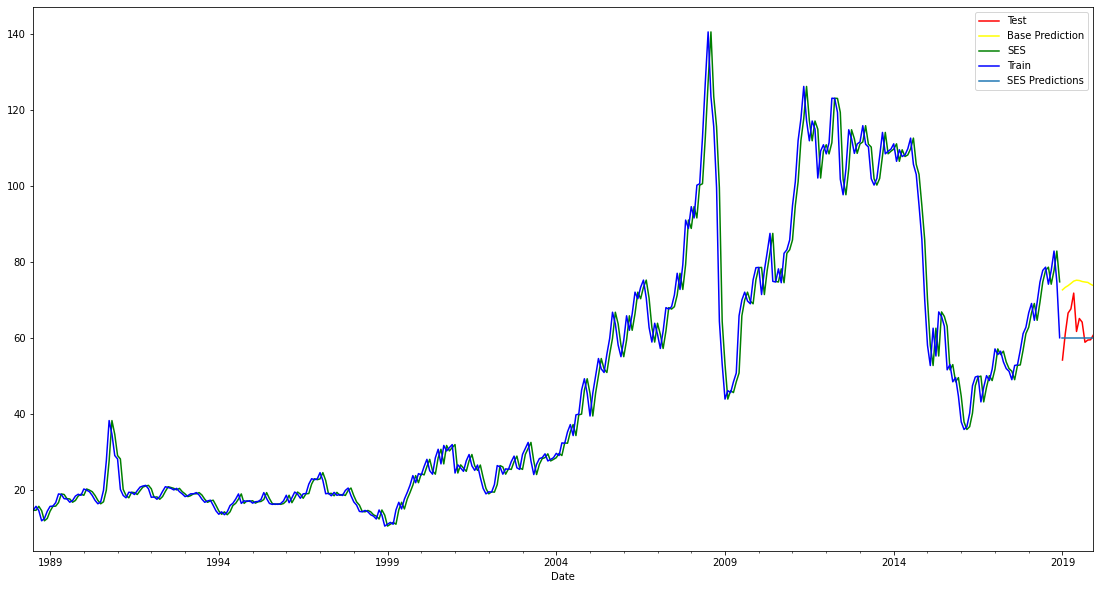

In [0]:
#Visualising smoothened curve and prediction
test.Open.plot(legend=True,label='Test',color = 'red')
test['SMA_prediction'].plot(figsize = (19,10),legend = True, label = 'Base Prediction', color = 'yellow')
train.SES.plot(legend=True,label='SES', color = 'green')
train.Open.plot(legend=True,label='Train',color = 'blue')
fitted_model_forecast.plot(legend=True,label='SES Predictions',figsize = (19,10));

In [0]:
#Forecast Accuracy
get_mape(test.Open,fitted_model_forecast)
from sklearn import metrics
from math import sqrt

rmse = sqrt(metrics.mean_squared_error(test.Open, fitted_model_forecast))
print(rmse)
get_mape(test.Open,fitted_model_forecast)

5.176283254743056


6.0

#Triple Exponential Smoothening

Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality and trend to the univariate time series.

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Trend and seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

In [0]:
fitted_model = ExponentialSmoothing(train.Open,
                                    trend='add',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

train['Exp_S'] = fitted_model.fittedvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
test_predictions1 = fitted_model.forecast(12)
test_predictions1

2019-01-01    60.478286
2019-02-01    59.569024
2019-03-01    62.628344
2019-04-01    64.981705
2019-05-01    68.448579
2019-06-01    67.309629
2019-07-01    65.969100
2019-08-01    64.706330
2019-09-01    67.471617
2019-10-01    66.919246
2019-11-01    63.280265
2019-12-01    61.222977
Freq: MS, dtype: float64

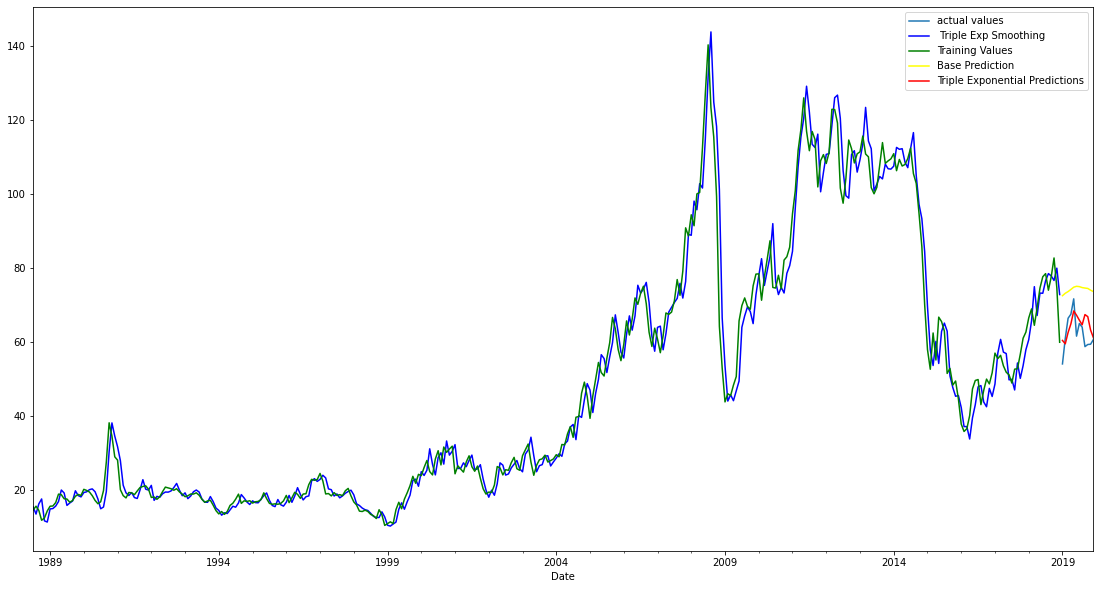

In [0]:
test.Open.plot(legend=True,label='actual values')
train['Exp_S'].plot(legend=True,label=' Triple Exp Smoothing', color =  'blue')
train.Open.plot(legend=True,label='Training Values', color = 'green')
test['SMA_prediction'].plot(figsize = (19,10),legend = True, label = 'Base Prediction', color = 'yellow')
test_predictions1.plot(legend=True,label='Triple Exponential Predictions',figsize = (19,10), color = 'red');

In [0]:
#Error
get_mape(test.Open.values,test_predictions1)

rmse = sqrt(metrics.mean_squared_error(test.Open, test_predictions1))
print(rmse)
get_mape(test.Open.values,test_predictions1)

4.612712204425959


6.22

Error decreased compared to Simple exponential smoothig


#Auto Regressive Model
In an autoregression model, we forecast using a linear combination of past values of the variable. The term autoregression describes a regression of the variable against itself. An autoregression is run against a set of lagged values of order  𝑝 .

𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜙2𝑦𝑡−2+⋯+𝜙𝑝𝑦𝑡−𝑝+𝜀𝑡

If we dont specify a maxleg and pass a information criterion(ic) instrad, statsmodels itself deciedes the optimal max length

In [0]:
#Import autoregressive models
from statsmodels.tsa.ar_model import AR,ARResults
model = AR(train.Open)
#fitting model
AR = model.fit(ic= "t-stat")

#checking parameters
print(AR.params)

#getting predictions
AR_prediction = AR.predict(start = len(train), end= len(train)+12)

const       0.688723
L1.Open     1.276854
L2.Open    -0.268230
L3.Open    -0.050219
L4.Open     0.077591
L5.Open    -0.173957
L6.Open     0.140207
L7.Open    -0.114384
L8.Open     0.081671
L9.Open     0.013058
L10.Open   -0.010935
L11.Open    0.179214
L12.Open   -0.266040
L13.Open    0.103051
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


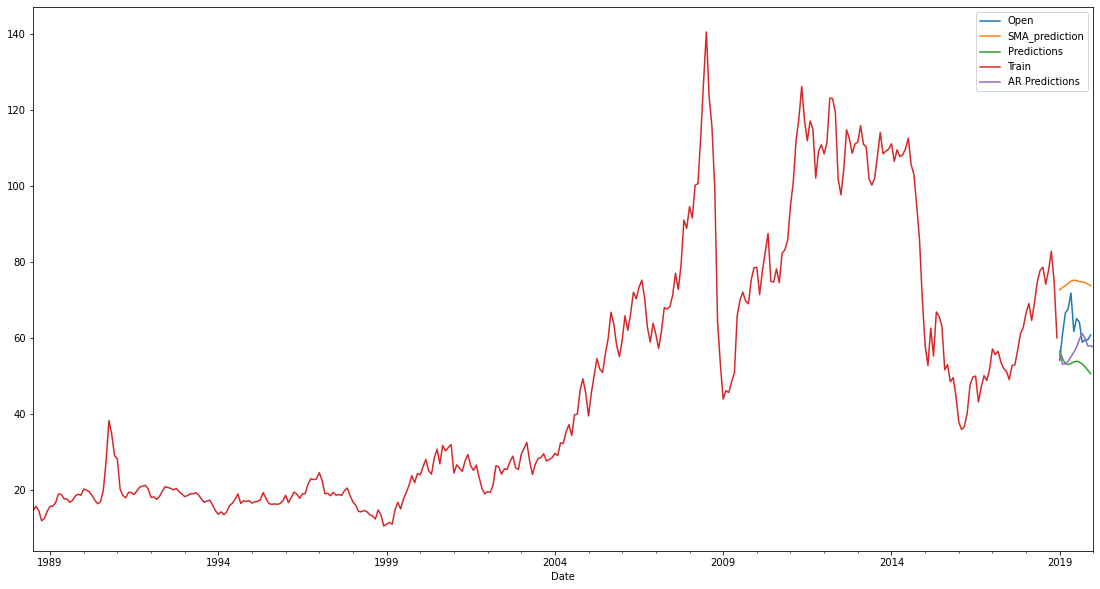

In [0]:
test.plot(legend=True,label='TEST')
train.Open.plot(legend=True,label='Train')
AR_prediction.plot(legend=True,label='AR Predictions',figsize=(19,10));

In [0]:
get_mape(test.Open,AR_prediction)
rmse = sqrt(metrics.mean_squared_error(test.Open, AR_prediction))
print(rmse)
get_mape(test.Open,AR_prediction)

ValueError: ignored

#Dickie Fuller Test for stationarity
Here we test 

In [0]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(ts):
  adfuller_result = adfuller(ts, autolag=None)
  adfuller_out = pd.Series(adfuller_result[0:4],
  index=["Test Statistic","p-value","Lags Used","Number of Observations Used"])
  print(adfuller_out)
  if adfuller_out.iloc[1]> 0.05:
    print('Data is NOT stationary')
  else:
    print('Data is stationary')

In [0]:
adfuller_test(oil_op.Open)

Test Statistic                  -1.494411
p-value                          0.536274
Lags Used                       17.000000
Number of Observations Used    364.000000
dtype: float64
Data is NOT stationary


As observed above from Dickie Fuller test it's not stationary. So we will be usinf ARIMA instead of ARMA model.

#ACF and PACF plot

In [0]:
# Import the models we'll be using in this section
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

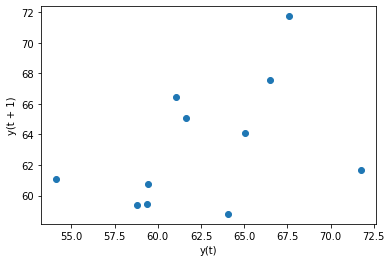

In [0]:
#lag plot
from pandas.plotting import lag_plot

lag_plot(test['Open']);

A ACF Plot can reveal recommended MA(q) orders for ARIMA model.

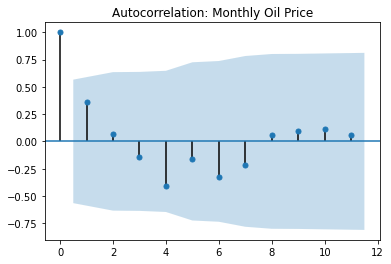

In [0]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Monthly Oil Price'
lags = 11
plot_acf(test.Open,title=title,lags=lags);

A PACF Plot can reveal recommended AR(p) orders for ARIMA model.

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


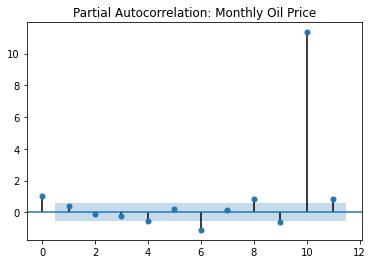

In [0]:
# Now let's plot the autocorrelation at different lags
title = 'Partial Autocorrelation: Monthly Oil Price'
lags = 11
plot_pacf(test.Open,title=title,lags=lags);

The PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms.

# Arima
 Autoregressive Independent Moving Average is actually a combination of 3 models:

AR(p) Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.<br>
I(d) Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary.<br>
MA(q) Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.<br><br>
 AR(1) model follows the formula(p)

     𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜀𝑡 
while an MA(1) model follows the formula(q)

     𝑦𝑡=𝜇+𝜃1𝜀𝑡−1+𝜀𝑡 
where  𝑐  is a constant,  𝜇  is the expectation of  𝑦𝑡  (often assumed to be zero),  𝜙1  (phi-sub-one) is the AR lag coefficient,  𝜃1  (theta-sub-one) is the MA lag coefficient, and  𝜀  (epsilon) is white noise.

An ARIMA(1,1) model therefore follows

     𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜃1𝜀𝑡−1+𝜀𝑡

## Chossing right parameters for ARIMA model.

In our approach we will be using a gridsearch to find the best parameters of the model instead of ACF and PACF plot. For this I will be using a third-party tool separate from statsmodels, "pdarima".

In [0]:
!pip install pmdarima
from pmdarima import auto_arima # for determining ARIMA orders
stepwise_fit = auto_arima(train.Open,m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 12) (constant=True); AIC=2173.847, BIC=2205.046, Time=2.586 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=2196.436, BIC=2204.235, Time=0.020 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=2169.582, BIC=2185.181, Time=0.385 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=2173.172, BIC=2188.772, Time=0.504 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=2194.673, BIC=2198.573, Time=0.018 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=2167.769, BIC=2179.469, Time=0.065 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 1, 12) (constant=True); AIC=2169.568, BIC=2185.168, Time=0.296 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 1, 12) (constant=True); AIC=2171.139, BIC=2190.639, Time=0.848 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=2169.672, BIC=2185.272, Time=0.097 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 12) (constant=True); AIC=2169.695,

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1080.885
Date:                Fri, 01 May 2020   AIC                           2167.769
Time:                        09:41:12   BIC                           2179.469
Sample:                             0   HQIC                          2172.419
                                - 366                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0770      0.265      0.291      0.771      -0.442       0.596
ar.L1          0.2872      0.032      9.050      0.000       0.225       0.349
sigma2        21.8559      0.914     23.907      0.000      20.064      23.648
===================================================================================
Ljung-Box (Q):                       44.65   Jarque-Bera (JB):               724.28
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):              13.05   Skew:                            -1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###It was suggested by auto ARIMA function to use SARIMAX function of order (1,1,0)

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train.Open,order=(1,1,0),enforce_invertibility=False)
result_SARIMAX = model.fit()
result_SARIMAX.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   Open   No. Observations:                  366
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1080.935
Date:                Fri, 01 May 2020   AIC                           2165.870
Time:                        09:41:12   BIC                           2173.670
Sample:                    07-01-1988   HQIC                          2168.970
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2877      0.032      9.049      0.000       0.225       0.350
sigma2        21.8636      0.860     25.419      0.000      20.178      23.549
===================================================================================
Ljung-Box (Q):                       44.65   Jarque-Bera (JB):               723.34
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):              13.07   Skew:                            -1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
result_SARIMAX_prediction = result_SARIMAX.forecast(12)

In [0]:
test

,Open,SMA_prediction,Predictions
Date,,,
2019-01-01,54.12,72.579167,56.530598
2019-02-01,61.06,73.240347,54.452682
2019-03-01,66.48,73.695793,53.139948
2019-04-01,67.58,74.271692,52.963551
2019-05-01,71.73,74.882250,53.201251
2019-06-01,61.64,75.123687,53.617747
2019-07-01,65.05,75.035661,53.804906
2019-08-01,64.09,74.777800,53.589243
2019-09-01,58.80,74.650116,53.077529


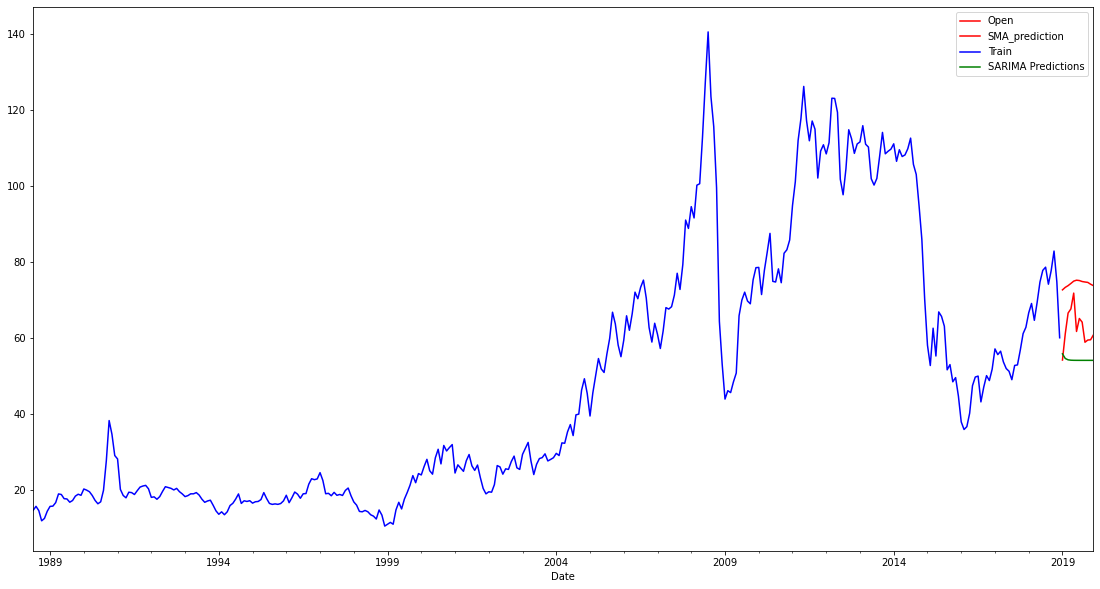

In [0]:
test[['Open','SMA_prediction']].plot(legend=True,label='TEST', color = 'red')
train.Open.plot(legend=True,label='Train', color = 'blue')
result_SARIMAX_prediction.plot(legend=True,label='SARIMA Predictions',figsize=(19,10), color = 'green');

In [0]:
get_mape(test.Open,result_SARIMAX_prediction)
rmse = sqrt(metrics.mean_squared_error(test.Open, result_SARIMAX_prediction))
print(rmse)
get_mape(test.Open,result_SARIMAX_prediction)

9.559552564682132


13.25

#Using LSTM for prediction

In [39]:
#training set
train

,Open,sma
Date,,
1988-07-01,14.60,NaN
1988-08-01,15.64,15.120
1988-09-01,14.50,15.070
1988-10-01,11.83,13.165
1988-11-01,12.45,12.140
...,...,...
2018-08-01,74.07,76.310
2018-09-01,77.69,75.880
2018-10-01,82.79,80.240


## scale data


In [0]:
# Scale Data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(train[['Open']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train[['Open']])
scaled_test = scaler.transform(test)

To apply LSTM on time Series Data it must be transformed to a certain format.<br> Keras has a built in function for that, TimeseriesGenerator.

In [43]:
#Time series generator
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [0]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# Create Model

In [0]:
from keras.models import Sequential
import tensorflow as tf

from keras.layers import Dense
from keras.layers import LSTM

In [46]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features),return_sequences = True))
model.add(LSTM(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 100)           40800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fit model
model.fit_generator(generator,epochs=25)

Epoch 1/25
354/354 [==============================] - 5s 14ms/step - loss: 0.0194
Epoch 2/25
354/354 [==============================] - 4s 12ms/step - loss: 0.0081
Epoch 3/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0076
Epoch 4/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0058
Epoch 5/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0059
Epoch 6/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0046
Epoch 7/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0036
Epoch 8/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0027
Epoch 9/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0027
Epoch 10/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0029
Epoch 11/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0027
Epoch 12/25
354/354 [==============================] - 4s 11ms/step - loss: 0.0024
Epoch 13/25
3

In [0]:
model.history.history.keys()

dict_keys(['loss'])

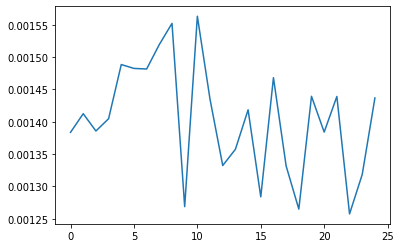

In [0]:
import matplotlib.pyplot as plt


loss_per_epoch = model.history.history['loss']

plt.plot(range(len(loss_per_epoch)),loss_per_epoch)


###Evaluation on test data

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
#Transforming data back to un-Scaled version 
true_predictions = scaler.inverse_transform(test_predictions)

In [0]:
true_predictions

array([[55.96640259],
       [54.42607314],
       [53.61583263],
       [53.82101566],
       [54.72853214],
       [55.9196204 ],
       [57.08790452],
       [58.1315136 ],
       [59.00077909],
       [59.60077673],
       [60.03432662],
       [60.36707491]])

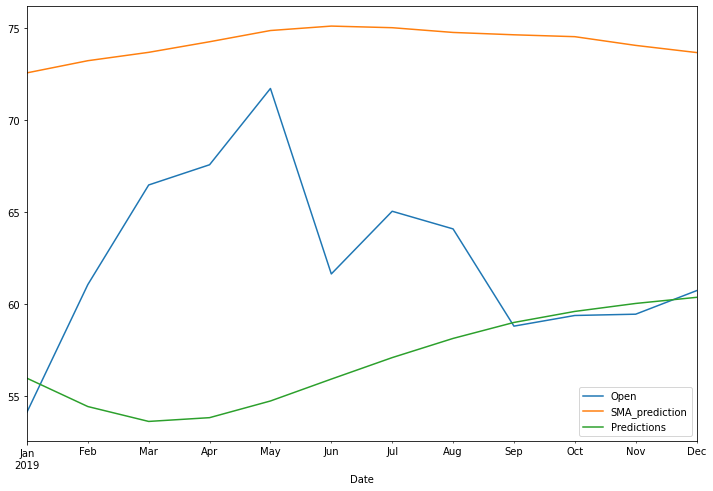

In [0]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions
test.plot(figsize=(12,8));

In [0]:
#prediction error
rmse = sqrt(metrics.mean_squared_error(test.Open,true_predictions ))
print(rmse)
get_mape(test.Open,test.Predictions)

8.283759332922637


9.23

LSTM predictions were the best performers.

In [0]:
model.save('My_model_oil_op.h5')

#Refrences:
1) https://www.youtube.com/watch?v=87Gx3U0BDlo<br>
2) https://medium.com/datadriveninvestor/time-series-prediction-using-sarimax-a6604f258c56<br>
3) https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887<br> 
4) https://medium.com/@kangeugine/time-series-arima-model-11140bc08c6